In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
class node(object):
    
    def __init__(self,state):
        self.state=state
        self.inbound={}
        self.outbound={}
        self.cost=0
        
    def __str__(self):
        string="State: "+str(self.state)
        return string

In [3]:
n=6
U=10

np.random.seed(78440)
    
cvals=np.random.randint(1,U,n)
wvals=np.random.randint(1,U,n)
W=sum(wvals)/2

In [4]:
n1=10
U1=10
    
cvals1=np.random.randint(1,U1,n1)
wvals1=np.random.randint(1,U1,n1)
W1=sum(wvals1)/2

def read_instance(address = 'instance.csv'):
    data = pd.read_csv(address)
    c = data['c'].values
    w = data['w'].values
    W = data['W'].values[0]
    return c,w,W

In [5]:
nex=4

cvalsex=[7,8,6,14]
wvalsex=[3,3,4,6]
Wex=6

In [6]:
nok=6

cvalsok=[2,2,3,3,2,4]
wvalsok=[9,8,5,3,2,1]
Wok=14

In [7]:
wvalstest = [90, 53, 32, 80, 90, 6, 61, 55, 76, 39, 16, 33, 63, 10, 16, 31, 18, 74, 100, 25, 9, 99, 23, 64, 14, 35, 44, 46, 80, 86, 70, 23, 52, 68, 50, 68, 24, 22, 57, 69, 88, 88, 11, 65, 9, 52, 13, 21, 10, 17, 47, 26, 28, 89, 24, 99, 57, 36, 27, 6, 12, 18, 9, 39, 43, 28, 8, 32, 47, 22, 11, 79, 19, 77, 79, 88, 100, 10, 97, 21, 82, 13, 57, 37, 59, 63, 14, 30, 37, 6, 6, 25, 65, 18, 55, 52, 48, 64, 21, 68, 85, 87, 1, 2, 86, 77, 86, 41, 17, 46, 38, 12, 97, 17, 17, 82, 21, 78, 72, 83, 28, 76, 50, 7, 98, 78, 80, 50, 91, 14, 79, 44, 38, 68, 50, 53, 84, 79, 13, 54, 80, 95, 44, 36, 37, 12, 5, 59, 76, 41]


cvalstest = [92, 44, 16, 51, 65, 94, 1, 87, 95, 12, 91, 25, 25, 16, 75, 7, 33, 46, 93, 20, 11, 28, 53, 65, 64, 32, 82, 14, 19, 18, 91, 8, 20, 81, 70, 66, 71, 88, 73, 22, 73, 78, 16, 37, 51, 87, 65, 77, 19, 9, 88, 66, 88, 61, 86, 5, 81, 60, 83, 49, 13, 24, 50, 7, 44, 85, 56, 64, 38, 84, 34, 29, 63, 11, 36, 86, 47, 96, 91, 73, 49, 88, 9, 84, 23, 40, 52, 71, 8, 98, 32, 29, 22, 68, 18, 36, 21, 76, 100, 80, 60, 2, 38, 74, 92, 84, 21, 37, 17, 3, 31, 69, 5, 69, 1, 17, 55, 35, 81, 76, 97, 21, 27, 22, 60, 48, 16, 42, 33, 6, 25, 10, 19, 32, 32, 20, 94, 67, 20, 35, 44, 49, 26, 22, 98, 93, 45, 36, 70, 53]

Wtest = 3553




ntest=len(wvalstest)


In [8]:
def Algorithm_1(n,cvals,wvals,W):
    
    #All layers is the tree containing each layer
    #All_layers keys are the layer numbers
    #Make root node before beginning
    all_layers={}
    all_layers[0]={}
    all_layers[0][0]=node(0)
    
    #Iterate through each layer
    for x in range(1,n):
        #Create next layer
        currLayer=all_layers[x-1]
        all_layers[x]={}
        nextLayer=all_layers[x]
        
        #Initialize layer variables
        #Saves having to compute this for each node in the layer
        w_current=wvals[x-1]
        c_current=cvals[x-1]
        
        #Begin with the 0 decision: deciding not to take the item
        #Node weight remains the same, so create new node in the subsequent layer
        #Direct arcs to new node
        for nodeInstance in currLayer.values():
            new_node=node(nodeInstance.state)
            nextLayer[nodeInstance.state]=new_node
            nodeInstance.outbound[0]=new_node
            new_node.inbound[0]=nodeInstance
        
        #Next do the 1 decision: deciding to take the item
        for nodeInstance in currLayer.values():
            newstate=nodeInstance.state+w_current
            #Feasability check
            if newstate<=W:
                #Check if the new state already exists in the subsequent layer
                if nextLayer.get(newstate):
                    #Add arc into node inbound and outbound
                    nodeInstance.outbound[c_current]=nextLayer[newstate]
                    nextLayer[newstate].inbound[c_current]=nodeInstance
                else:
                    #Create new node
                    new_node=node(newstate)
                    nextLayer[newstate]=new_node
                    #Add arc to node inbound and outbound
                    nodeInstance.outbound[c_current]=new_node
                    new_node.inbound[c_current]=nodeInstance
                        
    #Changed from W because Rachel said so
    terminal_node=node(-1)
    all_layers[n]={}
    all_layers[n][-1]=terminal_node
    
    w_final=wvals[n-1]
    c_final=cvals[n-1]
    
    #Our dictionary structure doesn't allow for a single node to have two arcs to the same node
    #Uniqueness of outbound index keys doesn't allow for it
    #Find a work around?
    
    #Final layer 0 decision
    for nodeInstance in all_layers[n-1].values():
        
        nodeInstance.outbound[0]=terminal_node
        terminal_node.inbound[0]=nodeInstance
    
    #Final layer 1 decision
    for nodeInstance in all_layers[n-1].values():
        
        if nodeInstance.state+w_final<=W:
            nodeInstance.outbound[c_final]=terminal_node
            terminal_node.inbound[c_final]=nodeInstance
            
    return all_layers

In [9]:
def Algorithm_2(reduced_layers,n):
    #Final reduction algorithm here we go
    #Starting from the second last layer moving up
    
    for x in range(n-1,0,-1):
        to_remove={}
        tail_list={}
        for nodeInstance in reduced_layers[x].values():
            #Add ending combination if not already in the tail list
            current_tuple=tuple(nodeInstance.outbound.items())
            
            #If ending combination exists
            if tail_list.get(current_tuple):
                to_remove[nodeInstance.state]=nodeInstance
                #Redirect arcs
                for arcCost, comingFrom in nodeInstance.inbound.items():
                    tail_list[current_tuple].inbound[arcCost]=comingFrom
                    comingFrom.outbound[arcCost]=tail_list[current_tuple]
                    
                    #Remove arcs from comingFrom node
                    if comingFrom.outbound.get(nodeInstance):
                        del(comingFrom.outbound[nodeInstance])

            
            #If ending combination does not exist
            else:
                tail_list[current_tuple]=nodeInstance
                        
        #Remove all duplicate nodes            
        for remove_node in to_remove.values():
            del(reduced_layers[x][remove_node.state])
            remove_node=None
        
    return reduced_layers

In [10]:
def Longest_Path(reduced_layers,cvals):
    #Initiate final score and trail list
    n=len(reduced_layers)-1
    final_score=0
    trail=[0]*(len(reduced_layers)-1)
    
    #Iterate through every node and incoming arc, update highest cost found
    for layer_no, layer in reduced_layers.items():
        for nodeInstance in layer.values():
            for arcCost, goingTo in nodeInstance.outbound.items():
                #Only update arcs where cost > 0
                if (nodeInstance.cost+arcCost)>goingTo.cost:
                    goingTo.cost=nodeInstance.cost+arcCost
                    
    #In the last layer of nodes find the node with the largest cost and set it as the final score
    for nodeInstance in reduced_layers[n].values():
        final_score=nodeInstance.cost
        break
        
    traceback=final_score
    current_node=reduced_layers[n][-1]
    
    for x in range(n,0,-1):
        
        previous_layer=reduced_layers.get(x-1)
        c_current=cvals[x-1]
        target=traceback-c_current
        
        for nodeInstance in previous_layer.values():
            
            if nodeInstance.cost==target:
                if nodeInstance.outbound.get(c_current) is current_node:
                    trail[x-1]=1
                    current_node=nodeInstance
                    traceback-=c_current
                    break
                    
            elif nodeInstance.cost==traceback:
                if nodeInstance.outbound.get(0) is current_node:
                    current_node=nodeInstance
                    break
    
            
    return final_score, trail

In [11]:
def Complexity_Testing(n):
    
    y=[]
    Algo_1=[]
    Sol_1=[]
    Algo_2=[]
    Sol_2=[]
    Full_Solve=[]
    Reduced_Solve=[]
    
    for n_test in range(5,n+1):
        
        U_test=n_test
        c_test=np.random.randint(1,U_test,n_test)
        w_test=np.random.randint(1,U_test,n_test)
        W_test=sum(w_test)/2
        
        start1=time.time()
        all_layers=Algorithm_1(n_test,c_test,w_test,W_test)
        end1=time.time()
        [full_finalScore,full_trail]=Longest_Path(all_layers,c_test)
        end2=time.time()
        reduced_layers=Algorithm_2(all_layers,n_test)
        end3=time.time()
        [reduced_finalScore,reduced_trail]=Longest_Path(reduced_layers,c_test)
        end4=time.time()
        
        y.append(n_test)
        Algo_1.append(end1-start1)
        Sol_1.append(end2-end1)
        Algo_2.append(end3-end2)
        Sol_2.append(end4-end3)
        Full_Solve.append(end2-start1)
        Reduced_Solve.append((end4-end2)+(end1-start1))
    
    plt.plot(y,Algo_1,label="Building")
    plt.plot(y,Sol_1,label="Full solve")
    plt.plot(y,Algo_2,label="Reduction")
    plt.plot(y,Sol_2,label="Reduced solve")
    #plt.plot(y,Full_Solve,label="Full Solve")
    #plt.plot(y,Reduced_Solve,label="Reduced Solve")
    
    
    plt.legend()
    plt.show()
        
    return None

In [12]:
[cvals2,wvals2,W2]=read_instance()
n2=len(cvals2)

In [13]:
testset=[ntest,cvalstest,wvalstest,Wtest]

start1=time.time()
all_layers=Algorithm_1(testset[0],testset[1],testset[2],testset[3])
end1=time.time()
[full_finalScore,full_trail]=Longest_Path(all_layers,testset[1])
end2=time.time()

reduced_layers=Algorithm_2(all_layers,testset[0])
end3=time.time()
[reduced_finalScore,reduced_trail]=Longest_Path(reduced_layers,testset[1])
end4=time.time()

if(full_finalScore==np.dot(full_trail,testset[1])):
    full_c_check="Passed!"
else:
    full_c_check="Calc: {}".format(np.dot(full_trail,testset[1]))

if(reduced_finalScore==np.dot(reduced_trail,testset[1])):
    reduced_c_check="Passed!"
else:
    reduced_c_check="Calc: {}".format(np.dot(reduced_trail,testset[1]))
    
if((np.dot(full_trail,testset[2]))<=testset[3]):
    full_w_check="Passed!"
else:
    full_w_check="W: {}, Calc: {}".format(testset[3],np.dot(full_trail,testset[2]))

if((np.dot(reduced_trail,testset[2]))<=testset[3]):
    reduced_w_check="Passed!"
else:
    reduced_w_check="W: {}, Calc: {}".format(testset[3],np.dot(reduced_trail,testset[2]))

In [14]:
#Just printing stuff, no biggie
    
print("Full BDD Build Time: {}s".format(end1-start1))
print("Full BDD Score Runtime: {}s".format(end2-end1))
print("Full BDD Optimal Solution: {}".format(full_finalScore))
print("Cost Check: {}".format(full_c_check))
print("Weight Check: {}\n".format(full_w_check))
print("Full BDD Trail: {}\n".format(full_trail))


print("BDD Reduction Time: {}s".format(end3-end2))
print("Reduced BDD Solution: {}s".format(end4-end3))
print("Reduced BDD Optimal Solution: {}".format(reduced_finalScore))
print("Cost Check: {}".format(reduced_c_check))
print("Weight Check: {}\n".format(reduced_w_check))
print("Reduced BDD Trail: {}\n".format(reduced_trail))

print("Fastest Runtime: {}s".format(min((end2-start1),((end4-end2)+(end1-start1)))))
print("Total Runtime: {}s".format(end4-start1))

Full BDD Build Time: 2.5085501670837402s
Full BDD Score Runtime: 0.5017073154449463s
Full BDD Optimal Solution: 5987
Cost Check: Passed!
Weight Check: Passed!

Full BDD Trail: [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]

BDD Reduction Time: 0.7595572471618652s
Reduced BDD Solution: 0.27184104919433594s
Reduced BDD Optimal Solution: 5987
Cost Check: Passed!
Weight Check: Passed!

Reduced BDD Trail: [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

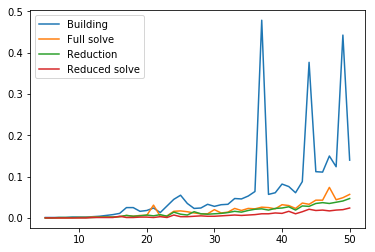

In [16]:
#Complexity testig
Complexity_Testing(50)